In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Import dataset

In [29]:
df = pd.read_csv('/Users/Douglas/Documents/GitHub/Silene-Invasive-Data/data/Garden data summed across censuses.csv')
df

,pop,cont_orig,cont_dest,site,treatment,block,plant_ID,sex,longevity,basal_lvs,...,num_smutted_fl,leaf_herb,gen_ENMY,spec_ENMY,sire,dam,sibship,sire.pop,dam.pop,Structure_region
0,JHN,NorthAmerica,Europe,UK,FI,UK03,1,V,1,2.0,...,0.0,0.0,0.0,0.0,43,44,22,4.0,4.0,4.0
1,BZE,Europe,Europe,CH,FI,CH04,3,M,3,70.0,...,0.0,3.0,0.0,0.0,9,10,5,2.0,2.0,2.0
2,KIS,Europe,NorthAmerica,CA,CN,CA12,4,M,7,66.0,...,0.0,1.0,0.0,0.0,49,50,25,2.0,2.0,2.0
3,BZE,Europe,NorthAmerica,VA,FI,VA07,5,M,3,23.0,...,0.0,1.0,0.0,0.0,9,10,5,2.0,2.0,2.0
4,CRE2,Europe,NorthAmerica,VA,CN,VA07,6,F,7,110.0,...,0.0,6.0,2.0,0.0,25,26,13,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,JNS,NorthAmerica,NorthAmerica,CA,CN,CA04,3175,V,5,23.0,...,0.0,1.0,0.0,0.0,45,46,23,4.0,4.0,4.0
2351,JNS,NorthAmerica,NorthAmerica,VA,CN,VA04,3180,F,7,80.0,...,0.0,9.0,2.0,0.0,45,46,23,4.0,4.0,4.0
2352,JNS,NorthAmerica,NorthAmerica,CA,FI,CA04,3185,M,7,44.0,...,0.0,1.0,0.0,0.0,45,46,23,4.0,4.0,4.0
2353,JNS,NorthAmerica,NorthAmerica,CA,FI,CA04,3190,V,7,65.0,...,0.0,1.0,0.0,0.0,45,46,23,4.0,4.0,4.0


#### Trim the data to exclude the X-variables, get summary stats

In [30]:
y_data_only = pd.concat([df.iloc[:,8:23]],axis = 1)
y_data_only

,longevity,basal_lvs,stem_lvs,total_lvs,status,rep_spd,flwr_num,frt_num,frt_hadena,reproduced,smut,num_smutted_fl,leaf_herb,gen_ENMY,spec_ENMY
0,1,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,70.0,40.0,110.0,8.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2,7,66.0,68.0,134.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,23.0,26.0,49.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7,110.0,85.0,195.0,17.0,28.0,0.0,3.0,0.0,2.0,0.0,0.0,6.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,5,23.0,4.0,27.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2351,7,80.0,112.0,192.0,17.0,28.0,0.0,9.0,0.0,2.0,0.0,0.0,9.0,2.0,0.0
2352,7,44.0,25.0,69.0,10.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2353,7,65.0,21.0,86.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Plot some histograms as Peter did so we can see how the transformations work

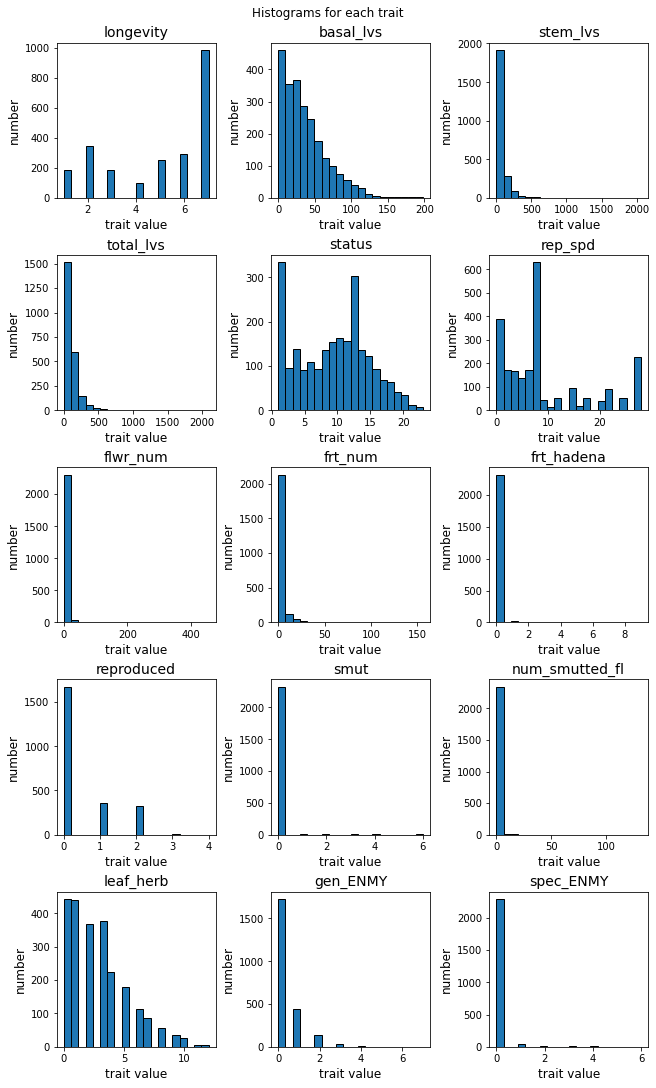

In [31]:
fig, axs = plt.subplots(nrows=5, ncols=3, constrained_layout=True)
fig.suptitle('Histograms for each trait')
fig.set_size_inches(9, 15)

for ax, column in zip(axs.flat, y_data_only):
    ax.hist(y_data_only[column], bins=20, ec='black')
    ax.set_xlabel('trait value', fontsize=12)
    ax.set_ylabel('number', fontsize=12)
    ax.set_title(column, fontsize=14)


#### Try SQRT transforming everything

#### The SQRT transformnation improves the situation, but things are never going to get to a normal distribution. longevity is skewed in the opposite direction and could be improved by taking the square or cube, but I am not sure it is worth it.

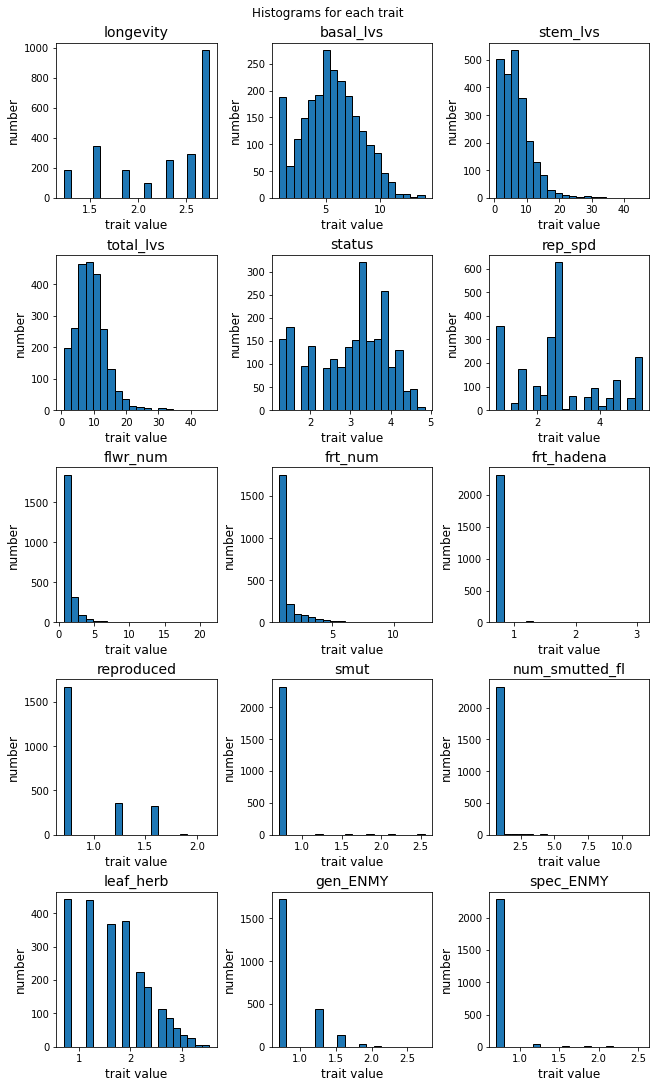

In [32]:
tr_y_data_only = y_data_only.transform(lambda x: (x + 0.5)**0.5)

fig, axs = plt.subplots(nrows=5, ncols=3, constrained_layout=True)
fig.suptitle('Histograms for each trait')
fig.set_size_inches(9, 15)

for ax, column in zip(axs.flat, tr_y_data_only):
    ax.hist(tr_y_data_only[column], bins=20, ec='black')
    ax.set_xlabel('trait value', fontsize=12)
    ax.set_ylabel('number', fontsize=12)
    ax.set_title(column, fontsize=14)


#### Try the log transformation

#### It looks to me like the log transformation works as well or better, so I'll use it.

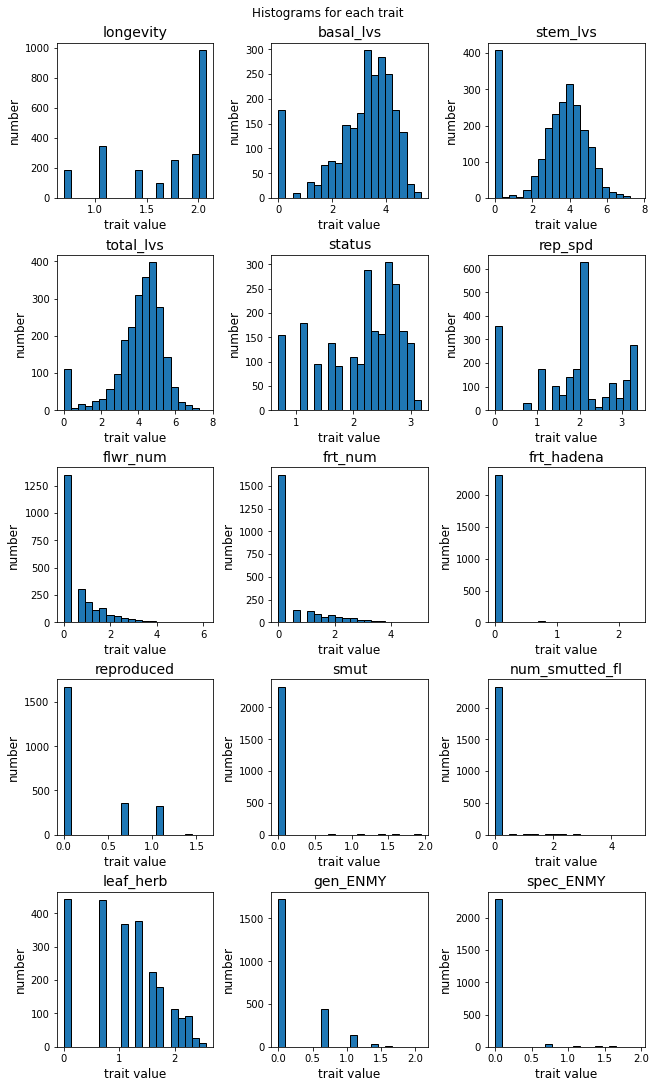

In [33]:
log_y_data_only = y_data_only.transform(lambda x: np.log(x + 1))

fig, axs = plt.subplots(nrows=5, ncols=3, constrained_layout=True)
fig.suptitle('Histograms for each trait')
fig.set_size_inches(9, 15)

for ax, column in zip(axs.flat, log_y_data_only):
    ax.hist(log_y_data_only[column], bins=20, ec='black')
    ax.set_xlabel('trait value', fontsize=12)
    ax.set_ylabel('number', fontsize=12)
    ax.set_title(column, fontsize=14)

#### When it comes to PCA, remember that fruit traits are missing values in males. If we do PCA on those data, males will be omitted. If we insert zeroes for missing values, that will serve to separate males from females in the PCA for trivial reasons. I will omit all fruit traits unless we are analyzing females only.

#### I also omitted smut traits because these three uninformative variables took over the data in my early rounds of PCA. Outliers have a large effect on PCAs and smut generates three variables with nothing but outliers.


In [34]:
features = log_y_data_only.drop(['frt_num', 'frt_hadena', 'reproduced', 'smut', 'num_smutted_fl', 'spec_ENMY'], axis=1)
features

,longevity,basal_lvs,stem_lvs,total_lvs,status,rep_spd,flwr_num,leaf_herb,gen_ENMY
0,0.693147,1.098612,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000
1,1.386294,4.262680,3.713572,4.709530,2.197225,1.386294,1.609438,1.386294,0.000000
2,2.079442,4.204693,4.234107,4.905275,2.484907,2.079442,0.000000,0.693147,0.000000
3,1.386294,3.178054,3.295837,3.912023,1.791759,1.386294,1.098612,0.693147,0.000000
4,2.079442,4.709530,4.454347,5.278115,2.890372,3.367296,0.000000,1.945910,1.098612
...,...,...,...,...,...,...,...,...,...
2350,1.791759,3.178054,1.609438,3.332205,1.945910,3.044522,0.000000,0.693147,0.000000
2351,2.079442,4.394449,4.727388,5.262690,2.890372,3.367296,0.000000,2.302585,1.098612
2352,2.079442,3.806662,3.258097,4.248495,2.397895,3.091042,0.693147,0.693147,0.000000
2353,2.079442,4.189655,3.091042,4.465908,2.397895,2.079442,0.000000,0.693147,0.000000


#### standardize everrything to a mean of 0 and a STD of 1

In [35]:
x = features.values
x = StandardScaler().fit_transform(x)

#### Run the PCA, and ask how many axes describe the data sufficiently

In [36]:
pca = PCA()
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.60804022, 0.11554326, 0.08807514, 0.06863033, 0.0554609 ,
       0.03573214, 0.02023521, 0.00505965, 0.00322316])

#### PC1 is obviously going to be size, the other PCs are similar in weights.

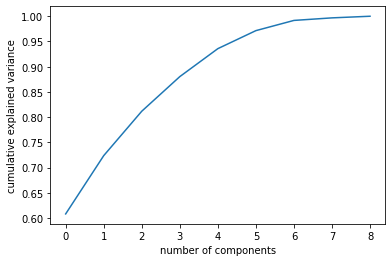

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Run the PCA on the first 5 components

In [38]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

#### Display a heatmap of the character weightings

<AxesSubplot:>

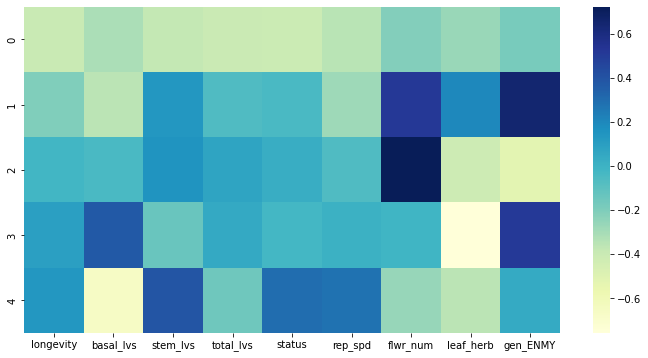

In [39]:
pca.components_
map= pd.DataFrame(pca.components_, columns=features.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap="YlGnBu")

#### Create the data set to visualize the data, color coded by some class variable, in this case, SEX

In [40]:
finalDf = pd.concat([principalDf, df[['sex']]], axis = 1)
finalDf

,PCA1,PCA2,PCA3,PCA4,PCA5,sex
0,5.241040,0.476715,0.180997,0.289573,-0.020712,V
1,-0.403093,0.224049,0.988574,-0.354008,-1.246666,M
2,-0.930008,-1.361528,0.118859,0.513948,0.227893,M
3,0.850824,0.074912,0.937980,0.102046,-0.335296,M
4,-2.911014,0.293863,-2.129234,0.709488,-0.027328,F
...,...,...,...,...,...,...
2350,0.629984,-1.307426,-0.221700,0.318688,0.312674,V
2351,-3.023075,0.510479,-2.307146,0.202476,0.022258,F
2352,-0.873673,-1.174926,0.502594,0.446741,0.334769,M
2353,-0.491205,-1.422742,-0.006839,0.585826,-0.010043,V


#### Visualize the result, colored by SEX

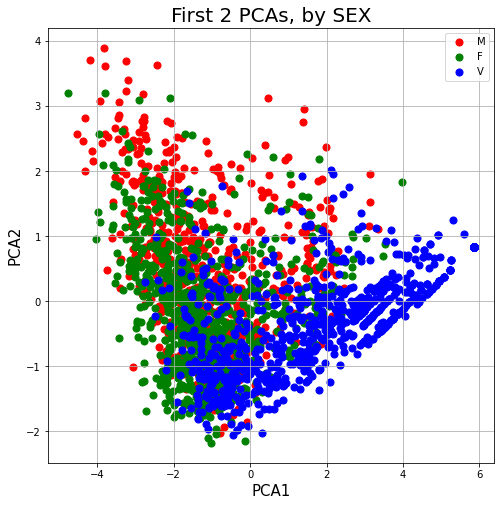

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('First 2 PCAs, by SEX', fontsize = 20)
targets = ['M', 'F', 'V']
colors = ['r', 'g', 'b']
for sex, color in zip(targets,colors):
    indicesToKeep = finalDf['sex'] == sex
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Display the results by deme

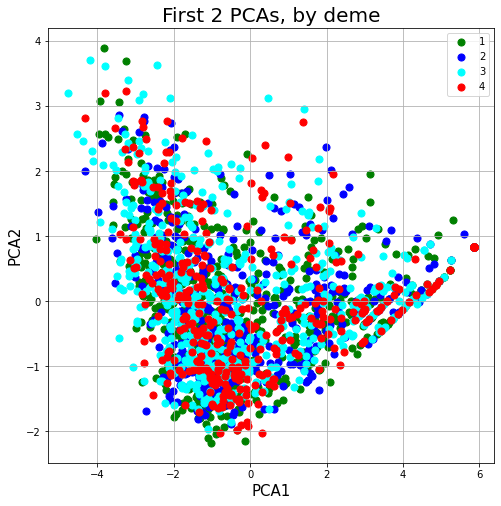

In [42]:
finalDf2 = pd.concat([principalDf, df[['Structure_region']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('First 2 PCAs, by deme', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['green', 'b', 'cyan', 'r']
for Structure_region, color in zip(targets,colors):
    indicesToKeep = finalDf2['Structure_region'] == Structure_region
    ax.scatter(finalDf2.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Display the results by Continent of Origin

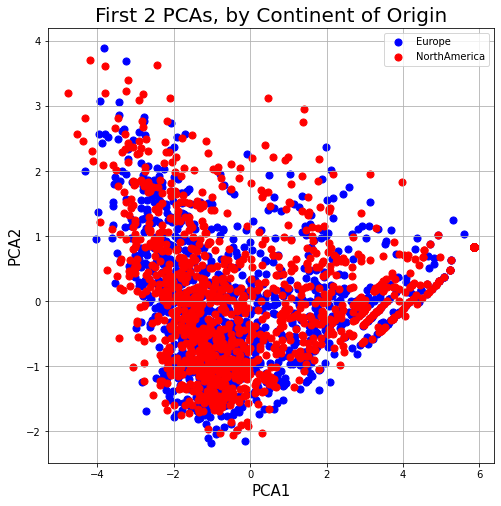

In [43]:
finalDf3 = pd.concat([principalDf, df[['cont_orig']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('First 2 PCAs, by Continent of Origin', fontsize = 20)
targets = ['Europe', 'NorthAmerica']
colors = ['b', 'r']
for cont_orig, color in zip(targets,colors):
    indicesToKeep = finalDf3['cont_orig'] == cont_orig
    ax.scatter(finalDf3.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Display the results by continent of destination

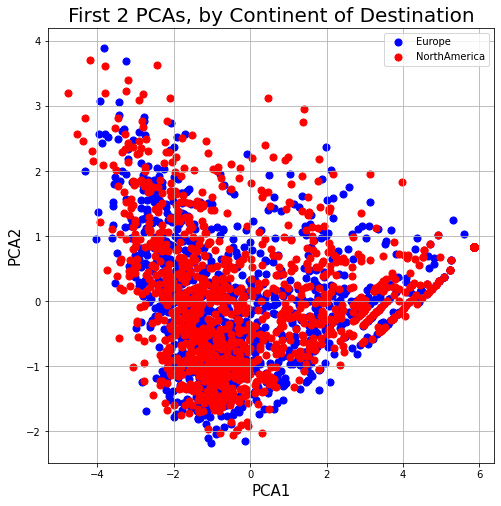

In [44]:
finalDf4 = pd.concat([principalDf, df[['cont_dest']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('First 2 PCAs, by Continent of Destination', fontsize = 20)
targets = ['Europe', 'NorthAmerica']
colors = ['b', 'r']
for cont_dest, color in zip(targets,colors):
    indicesToKeep = finalDf3['cont_orig'] == cont_dest
    ax.scatter(finalDf3.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Not terribly Inspiring, though I think you can argue that if the cont_dest effects are unclear, then this is just not the way to understand the data. 

#### just for kicks, let's display the family means instead of every data point. The following plots the mean PCA scores for each family, color coded by deme

In [45]:
pops = pd.concat([finalDf2, df[['pop']]],axis = 1)
pops = pd.concat([pops, df[['cont_orig']]], axis = 1)
pops = pops.groupby('pop').agg({'PCA1': np.mean, 
                                'PCA2': np.mean,
                                'PCA3': np.mean,
                                'PCA4': np.mean,
                                'PCA5': np.mean,
                                'cont_orig': 'first',
                                'Structure_region': 'first'
                                }).reset_index()
pops

,pop,PCA1,PCA2,PCA3,PCA4,PCA5,cont_orig,Structure_region
0,23S,-1.980938,0.464991,0.092644,0.017004,-0.112030,NorthAmerica,3.0
1,AOFT,-0.575105,0.400305,0.030902,-0.225114,0.224768,NorthAmerica,3.0
2,BDA,0.692680,0.000391,-0.093008,-0.167879,0.281233,Europe,2.0
3,BER,-0.598846,-0.300153,0.082450,0.007006,0.050250,Europe,1.0
4,BZE,1.056030,-0.080572,-0.045817,0.143521,0.041658,Europe,2.0
5,CCMI,-0.726090,0.421583,0.274132,-0.006249,-0.106563,NorthAmerica,4.0
6,CDR,-0.676745,0.006487,-0.675753,-0.329476,0.481749,Europe,1.0
7,CEG,-0.071506,0.108791,-0.056093,-0.328955,0.442551,Europe,2.0
8,CHELD1,-0.783140,0.196920,-0.113077,-0.178459,0.109745,NorthAmerica,3.0
9,CHELD2,-0.341604,-0.210109,0.080300,0.099796,0.117211,NorthAmerica,3.0


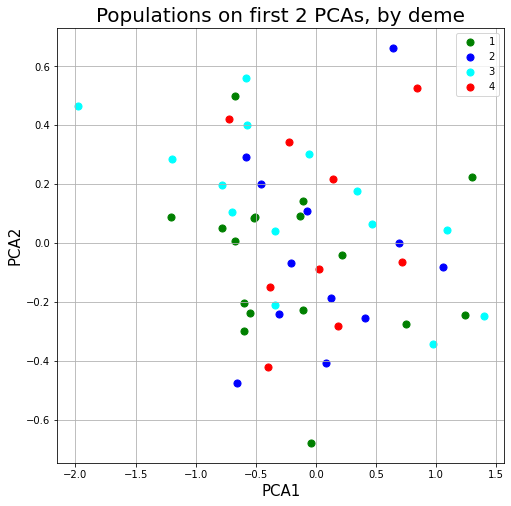

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('Populations on first 2 PCAs, by deme', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['green', 'b', 'cyan', 'r']
for Structure_region, color in zip(targets,colors):
    indicesToKeep = pops['Structure_region'] == Structure_region
    ax.scatter(pops.loc[indicesToKeep, 'PCA1']
               , pops.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### If you squint, something may be there. Why are there 4 demes, we should probably look at just the two major demes.

#### Let's divide the family means between those originating in Europe versus North America

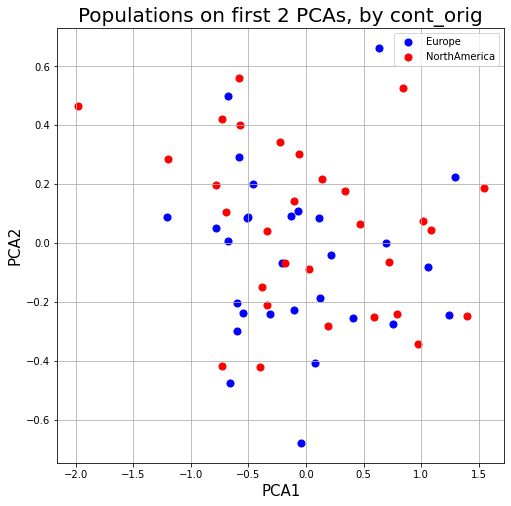

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('Populations on first 2 PCAs, by cont_orig', fontsize = 20)
targets = ['Europe', 'NorthAmerica']
colors = ['b', 'r']
for cont_orig, color in zip(targets,colors):
    indicesToKeep = pops['cont_orig'] == cont_orig
    ax.scatter(pops.loc[indicesToKeep, 'PCA1']
               , pops.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()